# Capstone Project - The Battle of Neighborhoods

## What are the common features of areas with high COVID case rate in New York?

## Introduction
On March 11, 2020, the World Health Organization declared that COVID-19 was a global pandemic, indicating a significant global spread of an infectious disease [1]. At that point, there were 118,000 confirmed cases of the coronavirus in 110 countries [2]. China was the first country to report the spread of this new disease with an outbreak in January 2020. South Korea, Iran, and Italy followed in February with their own outbreaks. Weeks later, the virus was in all continents and over 177 countries. Unfortunately, the United States has the highest number of confirmed cases and, sadly, the most deaths. The virus was extremely contagious and led to death in the most vulnerable, particularly those older than 60 and those with underlying conditions. A lot of cities suffered from overwhelming local health care systems.

As the deaths rose from the virus that had no effective treatment or vaccine, countries shut their borders, banned travel to other countries, and began to issue orders for their citizens to stay at home. Schools and universities closed their physical locations and moved education online. Sporting events were canceled, airlines cut flights, tourism evaporated, restaurants, movie theaters and bars closed, theater productions canceled, manufacturing facilities, services, and retail stores closed. In some businesses and industries, employees have been able to work remotely, but in others, workers have been laid off, furloughed, or had their hours cut. However, the virus didn't disappear like a miracle during the summer. And the situation bounced back in this fall and winter. This long-lasting situation has largely changed people's daily lives.

In this capstone project, I did a tiny study to explore the distribution of COVID cases in New York and tried to understand what were the common features of those neighborhoods with relatively high COVID confirmed cases. With the venues data collected from Foursquare, neighborhoods in New York were clustered into 5 groups. The results showed that 70% of the top 20 areas with the highest confirmed case rate were from the same group. And most venues in these areas with the highest amounts were in food-related categories, such as Pizza Place, Deli/Bodega, Restaurant, Bagel Shop, Ice Cream Shop, Grocery Store, Bakery, and Coffee Shop. The result suggests that we need to take extra caution when we have to visit these kinds of places during the pandemic.

This pandemic has demonstrated the interconnected nature of our world and that no one is safe until everyone is safe. Only by acting in solidarity can communities save lives and overcome the devastating impacts of the virus. I hope this little finding in this study can serve as a caution for everyone, helping them protect themselves, protect their families, and protect people around them.

## Data
### COVID data
The COVID case data of New York come from NYC Health [3,4]. The data contains cumulative totals since the start of the COVID-19 outbreak in New York City, which the Health Department defines as the diagnosis of the first confirmed COVID-19 case on February 29, 2020 [4]. The data used in this study were grouped by Modified Zip Code Tabulation Areas (MODIFIED_ZCTA). 

The geography information is reported using MODIFIED_ZCTA because it can be challenging to map data that are reported by ZIP Code. A ZIP Code doesn’t actually refer to an area, but rather a collection of points that make up a mail delivery route. Furthermore, there are some buildings that have their own ZIP Code, and some non-residential areas with ZIP Codes. To deal with the challenges of ZIP Codes, the Health Department uses ZCTAs which solidify ZIP codes into units of area. Often, data reported by ZIP code are actually mapped by ZCTA. The ZCTA geography was developed by the U.S. Census Bureau. The modified ZCTA geography combines census blocks with smaller populations to allow more stable estimates of population size for rate calculation.

In this dataset, one MODIFIED_ZCTA may contains one or more neighborhoods. And in some cases, one neighborhood is also separated into two or more MODIFIED_ZCTAs. Since this will not influence my search for features in areas with high COVID rate, I will perform the analysis using MODIFIED_ZCTA instead of neighborhood.

The data contain both number of confirmed cases by MODIFIED_ZCTA (COVID_CASE_COUNT) and rate of confirmed cases per 100,000 people by MODIFIED_ZCTA (COVID_CASE_RATE). To minimize the influence of different populations in different area, I only use COVID_CASE_RATE for my study.
### Geographical coordinate
The latitude and longitude for each MODIFIED_ZCTA are collected from GeoPy using geocoders.nominatim. These geographical coordinates will be used to search for venues in each area.
### Venue data
Venue data are collected from Foursquare. During to the limitation of requests that can be made, I only collect 100 venues for each MODIFIED_ZCTA with a radius of 1000m. The constraint here may have influence the final result. But it is still possible to obtain some preliminary understandings from the venue data. The venue data will be used to clustered different areas of New York City into groups. And areas with cluster labels will be compared with COVID rates in order to find out whether areas with high COVID rates have common features.

# Data processing and analysis

First of all, COVID case data are collected from NYC Health and stored as a dataframe.

In [1]:
import pandas as pd
covid_data = pd.read_csv('https://raw.githubusercontent.com/nychealth/coronavirus-data/master/totals/data-by-modzcta.csv')
covid_data.info()
covid_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MODIFIED_ZCTA      177 non-null    int64  
 1   NEIGHBORHOOD_NAME  177 non-null    object 
 2   BOROUGH_GROUP      177 non-null    object 
 3   COVID_CASE_COUNT   177 non-null    int64  
 4   COVID_CASE_RATE    177 non-null    float64
 5   POP_DENOMINATOR    177 non-null    float64
 6   COVID_DEATH_COUNT  177 non-null    int64  
 7   COVID_DEATH_RATE   177 non-null    float64
 8   PERCENT_POSITIVE   177 non-null    float64
 9   TOTAL_COVID_TESTS  177 non-null    int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 14.0+ KB


,MODIFIED_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,614,2223.58,27613.09,23,83.29,4.58,13304
1,10002,Chinatown/Lower East Side,Manhattan,2093,2778.71,75322.71,163,216.40,6.56,31852
2,10003,East Village/Gramercy/Greenwich Village,Manhattan,1060,1963.77,53977.81,33,61.14,3.33,31817
3,10004,Financial District,Manhattan,93,3129.08,2972.12,1,33.65,4.03,2283
4,10005,Financial District,Manhattan,168,1918.42,8757.23,0,0.00,3.85,4281
5,10006,Financial District,Manhattan,73,2158.61,3381.80,1,29.57,4.30,1698
6,10007,TriBeCa,Manhattan,143,2045.36,6991.45,4,57.21,3.16,4455
7,10009,Alphabet City/East Village/Stuyvesant Town-Coo...,Manhattan,1412,2470.64,57151.12,66,115.48,4.89,28717
8,10010,Flatiron/Gramercy/Kips Bay,Manhattan,688,2062.78,33353.00,23,68.96,3.51,19599
9,10011,Chelsea,Manhattan,1107,2225.31,49745.99,47,94.48,4.14,26657


177 areas (MODIFIED_ZCTAs) are collected. Some areas include two or more neighborhoods. For example, 10001 contains 3 neighborhoods, Chelsea, NoMad, and West Chelsea. In some other cases, one neighborhood can be divided into several MODIFIED_ZCTA. For example, Financial District are separated into 10003, 10004, and 10005; while both 10001 and 10011 show Chelsea. Since there is no way to attribute the COVID case count into each neighborhoods and I only need to focus on the common features, I will treat these neighborhoods together as one single area to simplify the process. And we will continue the following analysis based on MODIFIED_ZCTA.

Here, geographical coordinates of each MODIFIED_ZCTA are added to the dataframe.

In [2]:
from geopy.geocoders import Nominatim # convert an zipcode into latitude and longitude values

zipcode = covid_data.copy()
zipcode.insert(1, 'LATITUDE', None)
zipcode.insert(2, 'LONGITUDE', None)
zipcode = zipcode.astype({'LATITUDE': float, 'LONGITUDE': float})

for code in zipcode['MODIFIED_ZCTA']:
    address = 'NY, ' + str(code)
    geolocator = Nominatim(user_agent="newyork_explorer")
    location = geolocator.geocode(address)
    zipcode.loc[zipcode['MODIFIED_ZCTA'] == code, ['LATITUDE']] = location.latitude
    zipcode.loc[zipcode['MODIFIED_ZCTA'] == code, ['LONGITUDE']] = location.longitude
    
zipcode.info()
zipcode.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MODIFIED_ZCTA      177 non-null    int64  
 1   LATITUDE           177 non-null    float64
 2   LONGITUDE          177 non-null    float64
 3   NEIGHBORHOOD_NAME  177 non-null    object 
 4   BOROUGH_GROUP      177 non-null    object 
 5   COVID_CASE_COUNT   177 non-null    int64  
 6   COVID_CASE_RATE    177 non-null    float64
 7   POP_DENOMINATOR    177 non-null    float64
 8   COVID_DEATH_COUNT  177 non-null    int64  
 9   COVID_DEATH_RATE   177 non-null    float64
 10  PERCENT_POSITIVE   177 non-null    float64
 11  TOTAL_COVID_TESTS  177 non-null    int64  
dtypes: float64(6), int64(4), object(2)
memory usage: 16.7+ KB


,MODIFIED_ZCTA,LATITUDE,LONGITUDE,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS
0,10001,40.748418,-73.994114,Chelsea/NoMad/West Chelsea,Manhattan,614,2223.58,27613.09,23,83.29,4.58,13304
1,10002,40.717058,-73.989325,Chinatown/Lower East Side,Manhattan,2093,2778.71,75322.71,163,216.40,6.56,31852
2,10003,40.731588,-73.988525,East Village/Gramercy/Greenwich Village,Manhattan,1060,1963.77,53977.81,33,61.14,3.33,31817
3,10004,40.700769,-74.013464,Financial District,Manhattan,93,3129.08,2972.12,1,33.65,4.03,2283
4,10005,40.720503,-74.006704,Financial District,Manhattan,168,1918.42,8757.23,0,0.00,3.85,4281


Since different MODIFIED_ZCTAs have different populations, using actual COVID case counts will bias the result. To exclude the influence of population in each area, I use COVID_CASE_RATEs instead, which represent rate of confirmed cases per 100,000 people by MODZCTA. Now, I can select the columns I need and generate a new dataframe.

In [3]:
filtered_data = zipcode[['MODIFIED_ZCTA','NEIGHBORHOOD_NAME','BOROUGH_GROUP','LATITUDE','LONGITUDE','COVID_CASE_RATE']]
filtered_data.head()

,MODIFIED_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,LATITUDE,LONGITUDE,COVID_CASE_RATE
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,40.748418,-73.994114,2223.58
1,10002,Chinatown/Lower East Side,Manhattan,40.717058,-73.989325,2778.71
2,10003,East Village/Gramercy/Greenwich Village,Manhattan,40.731588,-73.988525,1963.77
3,10004,Financial District,Manhattan,40.700769,-74.013464,3129.08
4,10005,Financial District,Manhattan,40.720503,-74.006704,1918.42


The COVID data are updated daily. The data used in this study are based on the version of 12/16/2020.

Now we can create a map of New York and visualize the distribution of these COVID cases. The relative size of these bubbles represent the relative case rates of different areas.

In [4]:
address = 'New York, NY, USA'

geolocator = Nominatim(user_agent="ny_explorer")
ny_location = geolocator.geocode(address)
ny_latitude = ny_location.latitude
ny_longitude = ny_location.longitude
print('The geographical coordinate of New York are {}, {}.'.format(ny_latitude, ny_longitude))

The geographical coordinate of New York are 40.7127281, -74.0060152.


In [5]:
!pip install folium
import folium # map rendering library

     |████████████████████████████████| 93 kB 4.0 MB/s  eta 0:00:01


In [6]:
# create map of New York using latitude and longitude values
map_ny = folium.Map(location=[ny_latitude, ny_longitude], zoom_start = 10)

# add markers to map
for lat, lng, neighborhood, ZCTA, rate in zip(filtered_data['LATITUDE'], filtered_data['LONGITUDE'], 
                                              filtered_data['NEIGHBORHOOD_NAME'], 
                                              filtered_data['MODIFIED_ZCTA'], filtered_data['COVID_CASE_RATE']):
    label = '{}, {}'.format(neighborhood, ZCTA)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
                        [lat, lng],
                        radius = (rate/700),
                        popup = label,
                        color = 'red',
                        fill = True,
                        fill_color = '#ff3030',
                        fill_opacity = 0.7,
                        parse_html = False).add_to(map_ny)  
    
map_ny

Then, we need to retrieve venues for each MODIFIED_ZCTA using Foursquare API to explore the neighborhoods and segment them.

In [7]:
import requests # library to handle requests

In [8]:
# The code was removed by Watson Studio for sharing.

Here, we define a function to repeat the process of retrieving venues for each MODIFIED_ZCTA in New York. We will only collect 100 venues for each area, and we set the radius to 1000m.

In [9]:
def getNearbyVenues(codes, latitudes, longitudes, radius = 1000):
    
    venues_list=[]
    for code, lat, lng in zip(codes, latitudes, longitudes):
        print(code)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            code, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['MODIFIED_ZCTA', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Run the following code to collect the venue data.

In [10]:
ny_venues = getNearbyVenues(codes = filtered_data['MODIFIED_ZCTA'],
                            latitudes = filtered_data['LATITUDE'],
                            longitudes = filtered_data['LONGITUDE']
                            )



10001
10002
10003
10004
10005
10006
10007
10009
10010
10011
10012
10013
10014
10016
10017
10018
10019
10021
10022
10023
10024
10025
10026
10027
10028
10029
10030
10031
10032
10033
10034
10035
10036
10037
10038
10039
10040
10044
10065
10069
10075
10128
10280
10282
10301
10302
10303
10304
10305
10306
10307
10308
10309
10310
10312
10314
10451
10452
10453
10454
10455
10456
10457
10458
10459
10460
10461
10462
10463
10464
10465
10466
10467
10468
10469
10470
10471
10472
10473
10474
10475
11004
11101
11102
11103
11104
11105
11106
11109
11201
11203
11204
11205
11206
11207
11208
11209
11210
11211
11212
11213
11214
11215
11216
11217
11218
11219
11220
11221
11222
11223
11224
11225
11226
11228
11229
11230
11231
11232
11233
11234
11235
11236
11237
11238
11239
11354
11355
11356
11357
11358
11360
11361
11362
11363
11364
11365
11366
11367
11368
11369
11370
11372
11373
11374
11375
11377
11378
11379
11385
11411
11412
11413
11414
11415
11416
11417
11418
11419
11420
11421
11422
11423
11426
11427
11428
1142

In [11]:
print(ny_venues.shape)
ny_venues.head()

(13587, 7)


,MODIFIED_ZCTA,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,10001,40.748418,-73.994114,New York Pizza Suprema,40.750124,-73.994992,Pizza Place
1,10001,40.748418,-73.994114,iLoveKickboxing,40.746340,-73.992900,Boxing Gym
2,10001,40.748418,-73.994114,ALT: A Little Taste,40.746854,-73.992449,Café
3,10001,40.748418,-73.994114,Delta Sky360° Club,40.750564,-73.992824,Lounge
4,10001,40.748418,-73.994114,Marcelo Garcia Brazilian Jiu-Jitsu Academy,40.746565,-73.996275,Martial Arts School


We collected a total of 13589 different venues for these 177 areas with venue names and their categories.

We can also take a look at how many venues are returned for each area.

In [12]:
ny_venues.groupby('MODIFIED_ZCTA').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
MODIFIED_ZCTA,,,,,,
10001,100,100,100,100,100,100
10002,100,100,100,100,100,100
10003,100,100,100,100,100,100
10004,100,100,100,100,100,100
10005,100,100,100,100,100,100
...,...,...,...,...,...,...
11691,34,34,34,34,34,34
11692,26,26,26,26,26,26
11693,8,8,8,8,8,8


Let's find out how many unique categories are curated from all the returned venues.

In [15]:
print('There are {} unique categories.'.format(len(ny_venues['Venue Category'].unique())))

There are 444 unique categories.


Here, we use one hot encoding to show the results.

In [14]:
# one hot encoding
ny_onehot = pd.get_dummies(ny_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ny_onehot['MODIFIED_ZCTA'] = ny_venues['MODIFIED_ZCTA'] 

# move neighborhood column to the first column
fixed_columns = [ny_onehot.columns[-1]] + list(ny_onehot.columns[:-1])
ny_onehot = ny_onehot[fixed_columns]

ny_onehot.head()

,MODIFIED_ZCTA,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,...,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,10001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


And rows are further grouped by MODIFIED_ZCTA and by taking the mean of the frequency of occurrence of each category. In this way, we can easily sort our data and figure out the most common or popular venues in each area.

In [16]:
ny_grouped = ny_onehot.groupby('MODIFIED_ZCTA').mean().reset_index()
ny_grouped.head(10)

,MODIFIED_ZCTA,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,...,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,10001,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0
1,10002,0.0,0.0,0.0,0.0,0.0,0.03,0.0,0.0,0.0,...,0.0,0.0,0.01,0.03,0.01,0.0,0.00,0.01,0.0,0.0
2,10003,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.00,0.02,0.03,0.0,0.00,0.00,0.0,0.0
3,10004,0.0,0.0,0.0,0.0,0.0,0.04,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00,0.0,0.01,0.00,0.0,0.0
4,10005,0.0,0.0,0.0,0.0,0.0,0.04,0.0,0.0,0.0,...,0.0,0.0,0.01,0.02,0.02,0.0,0.00,0.02,0.0,0.0
5,10006,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.01,0.0,0.01,0.00,0.0,0.0
6,10007,0.0,0.0,0.0,0.0,0.0,0.03,0.0,0.0,0.0,...,0.0,0.0,0.00,0.02,0.02,0.0,0.00,0.02,0.0,0.0
7,10009,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0,...,0.0,0.0,0.00,0.06,0.03,0.0,0.00,0.00,0.0,0.0
8,10010,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,...,0.0,0.0,0.00,0.01,0.02,0.0,0.01,0.00,0.0,0.0
9,10011,0.0,0.0,0.0,0.0,0.0,0.03,0.0,0.0,0.0,...,0.0,0.0,0.00,0.02,0.00,0.0,0.01,0.03,0.0,0.0


Let's confirm the new size.

In [17]:
ny_grouped.shape

(177, 445)

Here, a function is defined to sort the venues in descending order.

In [18]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create a new dataframe and display the top 10 venues for each area. These venues will serve as features of areas and will be used to cluster these areas.

In [19]:
import numpy as np

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['MODIFIED_ZCTA']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['MODIFIED_ZCTA'] = ny_grouped['MODIFIED_ZCTA']

for ind in np.arange(ny_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ny_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,MODIFIED_ZCTA,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10001,Hotel,Korean Restaurant,Gym / Fitness Center,Coffee Shop,Italian Restaurant,Theater,Japanese Restaurant,Boxing Gym,Cuban Restaurant,Park
1,10002,Ice Cream Shop,Coffee Shop,French Restaurant,Bakery,Chinese Restaurant,Pizza Place,Bar,Wine Bar,Cocktail Bar,American Restaurant
2,10003,Ice Cream Shop,Coffee Shop,Pizza Place,Wine Shop,Juice Bar,Bar,Bakery,Bagel Shop,Hotel,Chinese Restaurant
3,10004,Coffee Shop,Mexican Restaurant,Bar,Gym,American Restaurant,Hotel,Café,Heliport,Park,Monument / Landmark
4,10005,Café,Clothing Store,Men's Store,Hotel,American Restaurant,Coffee Shop,Sushi Restaurant,Italian Restaurant,Spa,Gym / Fitness Center


In [20]:
neighborhoods_venues_sorted.shape

(177, 11)

With all these features of each area, we can use k-means method to cluster the areas. Before we group our data, we will first use the elbow method to find out the most suitable number of clusters, k.

In [21]:
from sklearn.cluster import KMeans
sse = []
k_max = 13
ny_grouped_clustering = ny_grouped.drop('MODIFIED_ZCTA', 1)

for k in range(1, k_max):
    kmeans = KMeans(n_clusters = k, random_state = 0)
    kmeans.fit(ny_grouped_clustering)
    sse.append(kmeans.inertia_)

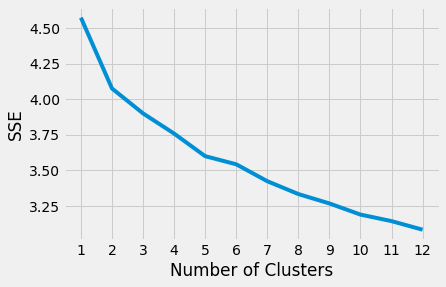

In [22]:
import matplotlib.pyplot as plt
 
plt.style.use("fivethirtyeight")
plt.plot(range(1, k_max), sse)
plt.xticks(range(1, k_max))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()


There are 2 obvious turns. Using only 2 clusters is not enough for this case, so I will use k = 5.

In [23]:
# set number of clusters
kclusters = 5

ny_grouped_clustering = ny_grouped.drop('MODIFIED_ZCTA', 1)

# run k-means clustering
kmeans = KMeans(n_clusters = kclusters, random_state = 0).fit(ny_grouped_clustering)

# check the first few cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 0, 0, 2, 2, 2, 2, 0, 2, 2], dtype=int32)

Let's create a new dataframe that includes the cluster labels as well as the top 10 venues for each area.

In [24]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

ny_merged = filtered_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
ny_merged = ny_merged.join(neighborhoods_venues_sorted.set_index('MODIFIED_ZCTA'), on='MODIFIED_ZCTA')

ny_merged.head() # check the last columns!

,MODIFIED_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,LATITUDE,LONGITUDE,COVID_CASE_RATE,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,40.748418,-73.994114,2223.58,2,Hotel,Korean Restaurant,Gym / Fitness Center,Coffee Shop,Italian Restaurant,Theater,Japanese Restaurant,Boxing Gym,Cuban Restaurant,Park
1,10002,Chinatown/Lower East Side,Manhattan,40.717058,-73.989325,2778.71,0,Ice Cream Shop,Coffee Shop,French Restaurant,Bakery,Chinese Restaurant,Pizza Place,Bar,Wine Bar,Cocktail Bar,American Restaurant
2,10003,East Village/Gramercy/Greenwich Village,Manhattan,40.731588,-73.988525,1963.77,0,Ice Cream Shop,Coffee Shop,Pizza Place,Wine Shop,Juice Bar,Bar,Bakery,Bagel Shop,Hotel,Chinese Restaurant
3,10004,Financial District,Manhattan,40.700769,-74.013464,3129.08,2,Coffee Shop,Mexican Restaurant,Bar,Gym,American Restaurant,Hotel,Café,Heliport,Park,Monument / Landmark
4,10005,Financial District,Manhattan,40.720503,-74.006704,1918.42,2,Café,Clothing Store,Men's Store,Hotel,American Restaurant,Coffee Shop,Sushi Restaurant,Italian Restaurant,Spa,Gym / Fitness Center


Finally, let's visualize the resulting clusters.

In [25]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[ny_latitude, ny_longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, rate in zip(ny_merged['LATITUDE'], ny_merged['LONGITUDE'], ny_merged['NEIGHBORHOOD_NAME'], 
                                        ny_merged['Cluster Labels'], ny_merged['COVID_CASE_RATE']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=(rate/700),
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

The data is now rearraged according to the COVID case rate, so we can take a look at what are the common features in areas with high COVID case rate. 

In [26]:
ny_merged_sorted = ny_merged.sort_values(['COVID_CASE_RATE'], ascending=False)
ny_merged_sorted.head(20)

,MODIFIED_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,LATITUDE,LONGITUDE,COVID_CASE_RATE,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
176,11697,Breezy Point,Queens,40.559684,-73.915031,7928.98,0,Bar,Clothing Store,Café,Park,Theater,Beach,Bank,Trail,Harbor / Marina,Grocery Store
140,11369,Airport/East Elmhurst,Queens,40.762499,-73.872825,6890.14,3,Hotel,Pizza Place,Rental Car Location,Gas Station,Donut Shop,Chinese Restaurant,Fast Food Restaurant,Bakery,Peruvian Restaurant,Supermarket
49,10306,Lighthouse Hill/Midland Beach/New Dorp/Oakwood,Staten Island,40.569002,-74.116771,5876.14,3,Bank,Mexican Restaurant,Italian Restaurant,Coffee Shop,Bus Stop,Bagel Shop,American Restaurant,Pizza Place,Sandwich Place,Supermarket
45,10302,Elm Park,Staten Island,40.630756,-74.137176,5799.31,3,Chinese Restaurant,Deli / Bodega,Pizza Place,Mediterranean Restaurant,Sandwich Place,Convenience Store,Asian Restaurant,Gym,Mobile Phone Shop,Shipping Store
142,11372,Jackson Heights,Queens,40.751377,-73.883138,5777.59,0,Thai Restaurant,Bakery,Mexican Restaurant,Latin American Restaurant,Indian Restaurant,Food Truck,South American Restaurant,Peruvian Restaurant,Grocery Store,Coffee Shop
116,11230,Midwood,Brooklyn,40.621525,-73.965615,5716.10,3,Pizza Place,Ice Cream Shop,Bagel Shop,Sushi Restaurant,Bank,Bakery,Convenience Store,Grocery Store,Japanese Restaurant,Supermarket
47,10304,New Dorp/Todt Hill,Staten Island,40.609770,-74.088140,5674.81,3,Deli / Bodega,Grocery Store,Playground,Bus Stop,Spanish Restaurant,Gym,Gym / Fitness Center,Theater,Hardware Store,Peruvian Restaurant
141,11370,Jackson Heights/Rikers Island,Queens,40.762385,-73.890552,5664.41,0,Bar,Bakery,Latin American Restaurant,Peruvian Restaurant,Playground,Fried Chicken Joint,Lounge,Empanada Restaurant,Sandwich Place,Park
139,11368,Corona/North Corona,Queens,40.748072,-73.860616,5554.96,3,Mexican Restaurant,Latin American Restaurant,Pizza Place,South American Restaurant,Food Truck,Donut Shop,Fast Food Restaurant,Deli / Bodega,Argentinian Restaurant,Pharmacy
66,10461,Morris Park/Pelham Bay/Westchester Square,Bronx,40.845863,-73.841032,5452.38,3,Pizza Place,Sandwich Place,Donut Shop,Fast Food Restaurant,Pharmacy,Bank,Gym,Italian Restaurant,Bar,Bakery


In [27]:
top20 = ny_merged_sorted.head(20)
top20.groupby('Cluster Labels').count()

,MODIFIED_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,LATITUDE,LONGITUDE,COVID_CASE_RATE,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Cluster Labels,,,,,,,,,,,,,,,,
0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
3,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14


The result shows that 70% of the top 20 area with high COVID case rates are labeled as cluster 3, which means those areas suffered from high COVID case rates do share some common features. So let's further exam the venues of these 14 areas labeled as cluster 3 in the top20 list. And all these 140 categories will be weighted and merged together into one dataframe. In this way, we can find out the most common venues in the high COVID case rate areas.

In [28]:
top20_cluster3 = top20[top20['Cluster Labels']==3]
top20_cluster3

,MODIFIED_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,LATITUDE,LONGITUDE,COVID_CASE_RATE,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
140,11369,Airport/East Elmhurst,Queens,40.762499,-73.872825,6890.14,3,Hotel,Pizza Place,Rental Car Location,Gas Station,Donut Shop,Chinese Restaurant,Fast Food Restaurant,Bakery,Peruvian Restaurant,Supermarket
49,10306,Lighthouse Hill/Midland Beach/New Dorp/Oakwood,Staten Island,40.569002,-74.116771,5876.14,3,Bank,Mexican Restaurant,Italian Restaurant,Coffee Shop,Bus Stop,Bagel Shop,American Restaurant,Pizza Place,Sandwich Place,Supermarket
45,10302,Elm Park,Staten Island,40.630756,-74.137176,5799.31,3,Chinese Restaurant,Deli / Bodega,Pizza Place,Mediterranean Restaurant,Sandwich Place,Convenience Store,Asian Restaurant,Gym,Mobile Phone Shop,Shipping Store
116,11230,Midwood,Brooklyn,40.621525,-73.965615,5716.10,3,Pizza Place,Ice Cream Shop,Bagel Shop,Sushi Restaurant,Bank,Bakery,Convenience Store,Grocery Store,Japanese Restaurant,Supermarket
47,10304,New Dorp/Todt Hill,Staten Island,40.609770,-74.088140,5674.81,3,Deli / Bodega,Grocery Store,Playground,Bus Stop,Spanish Restaurant,Gym,Gym / Fitness Center,Theater,Hardware Store,Peruvian Restaurant
139,11368,Corona/North Corona,Queens,40.748072,-73.860616,5554.96,3,Mexican Restaurant,Latin American Restaurant,Pizza Place,South American Restaurant,Food Truck,Donut Shop,Fast Food Restaurant,Deli / Bodega,Argentinian Restaurant,Pharmacy
66,10461,Morris Park/Pelham Bay/Westchester Square,Bronx,40.845863,-73.841032,5452.38,3,Pizza Place,Sandwich Place,Donut Shop,Fast Food Restaurant,Pharmacy,Bank,Gym,Italian Restaurant,Bar,Bakery
53,10310,Port Richmond/Randall Manor/West Brighton,Staten Island,40.631926,-74.116506,5387.87,3,Bus Stop,Pizza Place,Fast Food Restaurant,Sandwich Place,Music Store,Italian Restaurant,Bagel Shop,Mexican Restaurant,Chinese Restaurant,Breakfast Spot
48,10305,Arrochar/Midland Beach/Shore Acres/South Beach...,Staten Island,40.598444,-74.076018,5378.45,3,Italian Restaurant,Pharmacy,Deli / Bodega,Bus Stop,Bagel Shop,Cosmetics Shop,Bakery,Pizza Place,Liquor Store,Grocery Store
44,10301,Silver Lake/St. George,Staten Island,40.629516,-74.093853,5318.09,3,Bus Stop,Deli / Bodega,Sri Lankan Restaurant,Pizza Place,Park,Bar,Historic Site,Chinese Restaurant,Bagel Shop,Liquor Store


In [29]:
select_list = list(top20_cluster3['MODIFIED_ZCTA'])
feature = ny_grouped[ny_grouped['MODIFIED_ZCTA'].isin(select_list)]
feature

,MODIFIED_ZCTA,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,...,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
44,10301,0.00,0.0000,0.0,0.0,0.00,0.027027,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.027027,0.000000,0.0,0.000000,0.0
45,10302,0.00,0.0000,0.0,0.0,0.00,0.028571,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
47,10304,0.00,0.0000,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
48,10305,0.00,0.0000,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
49,10306,0.00,0.0000,0.0,0.0,0.00,0.036585,0.0,0.0,0.0,...,0.0,0.012195,0.0,0.0,0.000000,0.000000,0.012195,0.0,0.000000,0.0
50,10307,0.00,0.0000,0.0,0.0,0.00,0.033333,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
53,10310,0.00,0.0000,0.0,0.0,0.00,0.016667,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.016667,0.0
55,10314,0.00,0.0000,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
66,10461,0.00,0.0000,0.0,0.0,0.00,0.010870,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
73,10468,0.01,0.0000,0.0,0.0,0.01,0.010000,0.0,0.0,0.0,...,0.0,0.010000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0


In [30]:
cata = []
for column in top20_cluster3.columns[7:]:
    cata += list(top20_cluster3[column])

cata_set = set(cata)
len(cata_set)

60

There are 60 unique venues in these 14 areas.

In [31]:
cata_set

{'American Restaurant',
 'Argentinian Restaurant',
 'Asian Restaurant',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Bar',
 'Baseball Field',
 'Baseball Stadium',
 'Beach',
 'Breakfast Spot',
 'Brewery',
 'Bus Station',
 'Bus Stop',
 'Café',
 'Chinese Restaurant',
 'Coffee Shop',
 'Convenience Store',
 'Cosmetics Shop',
 'Deli / Bodega',
 'Diner',
 'Donut Shop',
 'Fast Food Restaurant',
 'Food',
 'Food Truck',
 'Fried Chicken Joint',
 'Gas Station',
 'Grocery Store',
 'Gym',
 'Gym / Fitness Center',
 'Hardware Store',
 'Historic Site',
 'Hotel',
 'Ice Cream Shop',
 'Italian Restaurant',
 'Japanese Restaurant',
 'Latin American Restaurant',
 'Lawyer',
 'Liquor Store',
 'Mediterranean Restaurant',
 'Mexican Restaurant',
 'Mobile Phone Shop',
 'Music Store',
 'Park',
 'Peruvian Restaurant',
 'Pharmacy',
 'Pizza Place',
 'Playground',
 'Pub',
 'Rental Car Location',
 'Sandwich Place',
 'Seafood Restaurant',
 'Shipping Store',
 'South American Restaurant',
 'Spanish Restaurant',
 'Sri Lankan Restau

In [32]:
feature2 = feature[cata_set]
feature2

,Spanish Restaurant,Baseball Stadium,Coffee Shop,Asian Restaurant,Deli / Bodega,Hardware Store,Bus Stop,South American Restaurant,Beach,Sushi Restaurant,...,Cosmetics Shop,Bus Station,Pharmacy,Japanese Restaurant,Café,Rental Car Location,Gym / Fitness Center,Latin American Restaurant,Argentinian Restaurant,Pizza Place
44,0.00000,0.000000,0.027027,0.000000,0.054054,0.00,0.081081,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.027027,0.000000,0.000000,0.027027,0.000000,0.00,0.054054
45,0.00000,0.000000,0.000000,0.028571,0.042857,0.00,0.028571,0.0000,0.000000,0.014286,...,0.014286,0.000000,0.028571,0.000000,0.014286,0.000000,0.014286,0.000000,0.00,0.042857
47,0.05000,0.000000,0.050000,0.000000,0.100000,0.05,0.050000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.00,0.050000
48,0.00000,0.000000,0.020408,0.000000,0.061224,0.00,0.061224,0.0000,0.000000,0.000000,...,0.040816,0.000000,0.061224,0.020408,0.000000,0.000000,0.020408,0.000000,0.00,0.040816
49,0.00000,0.000000,0.036585,0.012195,0.012195,0.00,0.036585,0.0000,0.000000,0.024390,...,0.000000,0.000000,0.024390,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.024390
50,0.00000,0.000000,0.000000,0.033333,0.100000,0.00,0.033333,0.0000,0.000000,0.000000,...,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.066667
53,0.00000,0.000000,0.033333,0.000000,0.016667,0.00,0.066667,0.0000,0.000000,0.000000,...,0.016667,0.000000,0.016667,0.000000,0.016667,0.016667,0.033333,0.000000,0.00,0.050000
55,0.00000,0.045455,0.045455,0.000000,0.045455,0.00,0.227273,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,0.00,0.045455
66,0.01087,0.000000,0.021739,0.021739,0.021739,0.00,0.000000,0.0000,0.000000,0.021739,...,0.000000,0.000000,0.043478,0.000000,0.000000,0.021739,0.010870,0.021739,0.00,0.065217
73,0.06000,0.000000,0.030000,0.000000,0.010000,0.00,0.010000,0.0000,0.000000,0.000000,...,0.000000,0.040000,0.010000,0.000000,0.020000,0.000000,0.010000,0.040000,0.00,0.060000


In [33]:
feature3 = feature2.sum().to_frame('Sum')
feature3

,Sum
Spanish Restaurant,0.130870
Baseball Stadium,0.045455
Coffee Shop,0.303441
Asian Restaurant,0.095839
Deli / Bodega,0.604513
Hardware Store,0.050000
Bus Stop,0.594735
South American Restaurant,0.062500
Beach,0.285714
Sushi Restaurant,0.109595


In [34]:
feature3.sort_values(['Sum'], ascending=False).head(20)

,Sum
Pizza Place,0.794616
Deli / Bodega,0.604513
Bus Stop,0.594735
Italian Restaurant,0.560006
Bagel Shop,0.401005
Ice Cream Shop,0.345016
Grocery Store,0.326751
Bakery,0.324681
Coffee Shop,0.303441
Pharmacy,0.303344


After summing up all the relative numbers of each categories, we can find out the top 20 most common categories in the high COVID case rate areas. The result shows that 70% of these popular venues are related to food. And here is bar plot to better show the relative amount of these venues. It clearly shows that Pizza Place, Deli/Bodega, Bus Stop, and Italian Restaurant have much larger relative amount than other categories in these areas. The result implies that these 4 categories may have positive relationship with COVID case rates.

In [35]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

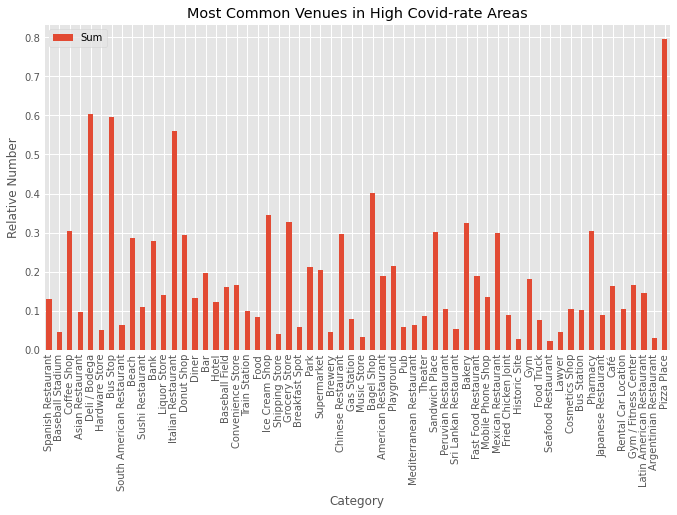

In [36]:
# step 2: plot data
feature3.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Category') # add to x-label to the plot
plt.ylabel('Relative Number') # add y-label to the plot
plt.title('Most Common Venues in High Covid-rate Areas') # add title to the plot

plt.show()

In [37]:
alldata = ny_merged[ny_merged.columns[0:7]]
alldata = alldata.join(ny_grouped.set_index('MODIFIED_ZCTA'), on='MODIFIED_ZCTA')
alldata.head(10)

,MODIFIED_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,LATITUDE,LONGITUDE,COVID_CASE_RATE,Cluster Labels,ATM,Accessories Store,Adult Boutique,...,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,40.748418,-73.994114,2223.58,2,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0
1,10002,Chinatown/Lower East Side,Manhattan,40.717058,-73.989325,2778.71,0,0.0,0.0,0.0,...,0.0,0.0,0.01,0.03,0.01,0.0,0.00,0.01,0.0,0.0
2,10003,East Village/Gramercy/Greenwich Village,Manhattan,40.731588,-73.988525,1963.77,0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.02,0.03,0.0,0.00,0.00,0.0,0.0
3,10004,Financial District,Manhattan,40.700769,-74.013464,3129.08,2,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00,0.0,0.01,0.00,0.0,0.0
4,10005,Financial District,Manhattan,40.720503,-74.006704,1918.42,2,0.0,0.0,0.0,...,0.0,0.0,0.01,0.02,0.02,0.0,0.00,0.02,0.0,0.0
5,10006,Financial District,Manhattan,40.708315,-74.013431,2158.61,2,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.01,0.0,0.01,0.00,0.0,0.0
6,10007,TriBeCa,Manhattan,40.714038,-74.008207,2045.36,2,0.0,0.0,0.0,...,0.0,0.0,0.00,0.02,0.02,0.0,0.00,0.02,0.0,0.0
7,10009,Alphabet City/East Village/Stuyvesant Town-Coo...,Manhattan,40.725920,-73.980784,2470.64,0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.06,0.03,0.0,0.00,0.00,0.0,0.0
8,10010,Flatiron/Gramercy/Kips Bay,Manhattan,40.739865,-73.985277,2062.78,2,0.0,0.0,0.0,...,0.0,0.0,0.00,0.01,0.02,0.0,0.01,0.00,0.0,0.0
9,10011,Chelsea,Manhattan,40.740861,-73.999440,2225.31,2,0.0,0.0,0.0,...,0.0,0.0,0.00,0.02,0.00,0.0,0.01,0.03,0.0,0.0


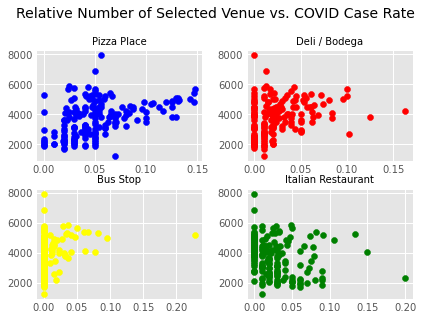

In [38]:
fig, axs = plt.subplots(2, 2)
fig.tight_layout()

axs[0, 0].scatter(alldata['Pizza Place'], alldata['COVID_CASE_RATE'], c='b',label='Pizza Place')
axs[0, 0].set_title('Pizza Place',fontsize=10)
axs[0, 1].scatter(alldata['Deli / Bodega'], alldata['COVID_CASE_RATE'], c='r',label='Deli / Bodega')
axs[0, 1].set_title('Deli / Bodega',fontsize=10)
axs[1, 0].scatter(alldata['Bus Stop'], alldata['COVID_CASE_RATE'], c='yellow',label='Bus Stop')
axs[1, 0].set_title('Bus Stop',fontsize=10)
axs[1, 1].scatter(alldata['Italian Restaurant'], alldata['COVID_CASE_RATE'], c='g',label='Italian Restaurant')
axs[1, 1].set_title('Italian Restaurant',fontsize=10)

fig.suptitle('Relative Number of Selected Venue vs. COVID Case Rate',fontsize=14, y=1.1)
plt.show()

If we apply this to all 177 MODIFIED_ZCTAs, we can generate the scatter plots above. The x-axis represents the relative number of selected categories in each area, while the y-axis is the COVID case rate. It seems that there is a strong positive relationship between Pizza Place and COVID case rate. Deli/Bodega also shows a weaker relationship, while there is basically no relationship between Bus Stop or Italian Restaurant and case rate. This is probably because these two categories are selected from cluster label 3, and Bus Stop or Italian Restaurant are not features or common categories in other clusters.

## Results
From this preliminary study, we notice that most of the MODIFIED_ZCTAs with high COVID case rates are clustered into same groups (Cluster 3), implying that they share similar features. Closer examination of 14 areas labeled with cluster 3 in the top 20 highest COVID-case-rate areas shows that food related categories are quite common. 70% of the top 20 most common venues in these 14 areas are in food-related categories, such as Pizza Place, Deli/Bodega, Restaurant, Bagel Shop, Ice Cream Shop, Grocery Store, Bakery, and Coffee Shop. The result suggests that we need to take extra caution when we have to visit these kinds of places during the pandemic. Although this study is quite limited by the data, I still hope this little finding can serve as a caution for everyone, helping people to protect themselves, protect their families, and protect people around them from the virus.

## References
[1] https://www.who.int/emergencies/diseases/novel-coronavirus-2019 <br>
[2] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7205668/ <br>
[3] https://www1.nyc.gov/site/doh/covid/covid-19-data.page <br>
[4] https://github.com/nychealth/coronavirus-data <br>